In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv('titanic_train.csv',header=0)

In [55]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
# In column cabin there is null value in 687 rows out of 891 rows,I am dropping this column as it will not have any impact or 
#will not be helpful in determining the outcome and for training the model.
#Looking at data of columns ticket and Name, we can guess that they will add no value to model building process, hence dropping them.
# we will replace null value in Embarked column with most used values technique.
# In age column, we will replace/update null values with mean value of this column 

In [60]:
delete_col=['Cabin','Name','Ticket']
df.drop(delete_col,axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [62]:
df['Age']=df['Age'].fillna(df['Age'].mean())
#df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts().index[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [63]:
#Now we have all useful columns in our dataset. Now we will look at values in remaining columns and decide whether encoding
#is required or not
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
#We will need to use encoding technique for columns Sex and Embarked
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [66]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [67]:
j=0
for i in df['Fare']:
    if (i==0.0):
        j=j+1
print(j)

15


In [68]:
#In describe method we can see that min value for 'Fare' column is 0 and from above code we can see that there are 15 passengers
#whose fare price is 0. I am considering that they must have got their ticket in lottery and have travelled free. I am ignoring
#this scenario and considering this data valid for model building

<AxesSubplot:>

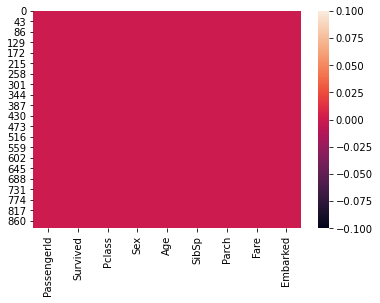

In [69]:
sns.heatmap(df.isnull()) # heatmap also indicates that there are  no null values in data

In [70]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Sex              1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
Embarked         1.0000
dtype: float64


In [71]:
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

     PassengerId  Survived  Pclass    Sex    Age  SibSp  Parch   Fare  \
0          False     False   False  False  False  False  False  False   
1          False     False   False  False  False  False  False  False   
2          False     False   False  False  False  False  False  False   
3          False     False   False  False  False  False  False  False   
4          False     False   False  False  False  False  False  False   
..           ...       ...     ...    ...    ...    ...    ...    ...   
886        False     False   False  False  False  False  False  False   
887        False     False   False  False  False  False  False  False   
888        False     False   False  False  False  False  False  False   
889        False     False   False  False  False  False  False  False   
890        False     False   False  False  False  False  False  False   

     Embarked  
0       False  
1       False  
2       False  
3       False  
4       False  
..        ...  
886     Fal

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False


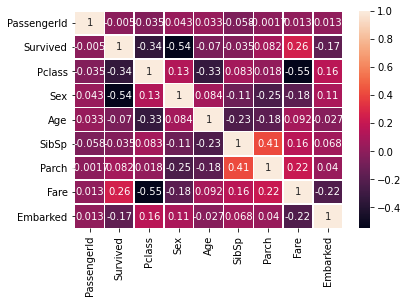

In [72]:
corr= df.corr()
sns.heatmap(corr,annot=True,linewidths=.5)
plt.show()

80.0

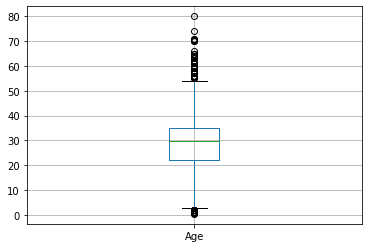

In [73]:
df.boxplot('Age')
df['Age'].min()
df['Age'].max()

# Box plot shows that there are outliers in Age column but when we check min and max value in this column, these values are
# within acceptable range, hence we are ignoring these outliers.

In [74]:
x= df.iloc[:,0:-1]

In [75]:
x.shape

(891, 8)

In [76]:
y=df.iloc[:,-1]

In [77]:
y.shape

(891,)

In [78]:
best_rstate_mnb=0
best_acc_score_mnb=0
for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(train_x,train_y)
    pred_mnb=mnb.predict(test_x)
    temp_acc_score_mnb=accuracy_score(pred_mnb,test_y)
    if temp_acc_score_mnb > best_acc_score_mnb:
        best_acc_score_mnb = temp_acc_score_mnb
        best_rstate_mnb=i
        
print("Best_Accuracy score is:",best_acc_score_mnb, "\nBest random state value is:",best_rstate_mnb)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_mnb)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
mnb.fit(train_x,train_y)
predmnb=mnb.predict(test_x)
print("Predicted values using MultinomailNB model:\n",predmnb)

print("Random state used is:",best_rstate_mnb)
print("Accuracy score:",accuracy_score(predmnb,test_y))
print("Confusion matrix:\n",confusion_matrix(test_y, predmnb))
print("Classification report:\n",classification_report(test_y,predmnb))

Best_Accuracy score is: 0.4692737430167598 
Best random state value is: 205
Predicted values using MultinomailNB model:
 [1 1 0 0 2 2 1 2 2 0 2 1 2 0 0 1 2 1 2 1 0 1 2 0 1 1 1 1 1 2 2 1 1 1 2 2 0
 2 1 1 0 1 1 0 0 1 0 0 2 0 0 0 2 0 1 1 1 0 0 1 1 1 2 2 0 2 2 2 2 0 1 0 0 1
 1 2 1 2 0 1 1 0 2 2 1 0 0 1 2 1 2 1 0 2 0 0 1 2 2 0 0 1 2 0 0 0 1 0 0 0 2
 1 1 0 0 0 2 1 1 1 2 1 0 2 1 2 0 2 2 2 1 2 2 1 1 2 2 1 1 1 2 0 2 2 1 0 0 2
 1 2 0 1 0 1 2 2 0 2 2 1 0 2 1 1 0 1 2 0 1 2 0 1 0 1 1 1 0 2 0]
Random state used is: 205
Accuracy score: 0.4692737430167598
Confusion matrix:
 [[25 10  5]
 [ 1  9  2]
 [30 47 50]]
Classification report:
               precision    recall  f1-score   support

           0       0.45      0.62      0.52        40
           1       0.14      0.75      0.23        12
           2       0.88      0.39      0.54       127

    accuracy                           0.47       179
   macro avg       0.49      0.59      0.43       179
weighted avg       0.73      0.47      0.52     

In [79]:
best_rstate_svc=0
best_acc_score_svc=0
for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    svc=SVC()
    svc.fit(train_x,train_y)
    pred_svc=svc.predict(test_x)
    temp_acc_score_svc=accuracy_score(pred_svc,test_y)
    if temp_acc_score_svc > best_acc_score_svc:
        best_acc_score_svc = temp_acc_score_svc
        best_rstate_svc=i
        
print("Best_Accuracy score is:",best_acc_score_svc, "\nBest random state value is:",best_rstate_svc)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_svc)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
svc.fit(train_x,train_y)
predsvc=svc.predict(test_x)
print("Predicted values using SVC model:\n",predsvc)

print("Random state used is:",best_rstate_svc)
print("Accuracy score:",accuracy_score(predsvc,test_y))
print("Confusion matrix:\n",confusion_matrix(test_y, predsvc))
print("Classification report:\n",classification_report(test_y,predsvc))

Best_Accuracy score is: 0.8324022346368715 
Best random state value is: 246
Predicted values using SVC model:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Random state used is: 246
Accuracy score: 0.8324022346368715
Confusion matrix:
 [[  1   0  21]
 [  0   0   9]
 [  0   0 148]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.09        22
           1       0.00      0.00      0.00         9
           2       0.83      1.00      0.91       148

    accuracy                           0.83       179
   macro avg       0.61      0.35      0.33       179
weighted avg       0.81      0.83      0.76      

In [80]:
best_rstate_dtc=0
best_acc_score_dtc=0
for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred_dtc=dtc.predict(test_x)
    temp_acc_score_dtc=accuracy_score(pred_dtc,test_y)
    if temp_acc_score_dtc > best_acc_score_dtc:
        best_acc_score_dtc = temp_acc_score_dtc
        best_rstate_dtc=i
        
print("Best_Accuracy score is:",best_acc_score_dtc, "\nBest random state value is:",best_rstate_dtc)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_dtc)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
dtc.fit(train_x,train_y)
preddtc=dtc.predict(test_x)
print("Predicted values using Decision Tree Classifier model:\n",preddtc)

print("Random state used is:",best_rstate_dtc)
print("Accuracy score:",accuracy_score(preddtc,test_y))
print("Confusion matrix:\n",confusion_matrix(test_y, preddtc))
print("Classification report:\n",classification_report(test_y,preddtc))

Best_Accuracy score is: 0.8659217877094972 
Best random state value is: 464
Predicted values using Decision Tree Classifier model:
 [0 2 2 0 2 2 2 0 2 0 0 2 0 1 2 2 2 0 2 2 2 2 2 0 1 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 0 2 0 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 0 2 2 1 2 0 1 2 2 0 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 0 2 0 0 2 2 0 2 2 1 2 2 2 2 0 2 2 2 1 1 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2 0 1 2 0 1 2 0 0 2 0 2 1 2 0 0 1 2 0 2 2
 0 2 2 2 2 2 0 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2]
Random state used is: 464
Accuracy score: 0.8435754189944135
Confusion matrix:
 [[ 25   0  11]
 [  0  12   2]
 [  9   6 114]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71        36
           1       0.67      0.86      0.75        14
           2       0.90      0.88      0.89       129

    accuracy                           0.84       179
   macro avg       0.77      0.81      0.78       179
weighted avg       0.85     

In [81]:
best_rstate_knn=0
best_acc_score_knn=0
for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(train_x,train_y)
    pred_knn=knn.predict(test_x)
    temp_acc_score_knn=accuracy_score(pred_knn,test_y)
    if temp_acc_score_knn > best_acc_score_knn:
        best_acc_score_knn = temp_acc_score_knn
        best_rstate_knn=i
        
print("Best_Accuracy score is:",best_acc_score_knn, "\nBest random state value is:",best_rstate_knn)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=best_rstate_knn)
#train_x.shape,test_x.shape,train_y.shape,test_y.shape
#lg=LogisticRegression()
knn.fit(train_x,train_y)
predknn=knn.predict(test_x)
print("Predicted values using Decision Tree Classifier model:\n",predknn)

print("Random state used is:",best_rstate_knn)
print("Accuracy score:",accuracy_score(predknn,test_y))
print("Confusion matrix:\n",confusion_matrix(test_y, predknn))
print("Classification report:\n",classification_report(test_y,predknn))

Best_Accuracy score is: 0.7541899441340782 
Best random state value is: 2
Predicted values using Decision Tree Classifier model:
 [2 0 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 0
 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 0 0 2 2 2 2 2
 2 2 0 2 2 1 2 1 2 0 2 1 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2]
Random state used is: 2
Accuracy score: 0.7541899441340782
Confusion matrix:
 [[  8   1  15]
 [  0   0   9]
 [ 13   6 127]]
Classification report:
               precision    recall  f1-score   support

           0       0.38      0.33      0.36        24
           1       0.00      0.00      0.00         9
           2       0.84      0.87      0.86       146

    accuracy                           0.75       179
   macro avg       0.41      0.40      0.40       179
weighted avg       0.74      0.7

In [82]:
algo_list=(mnb,svc,dtc,knn)
for i in algo_list:
    cross_score=cross_val_score(i,x,y,cv=5)
    print("Cross validation score of",i,"is=",cross_score)
    print("Cross validation mean score of",i,"is=",cross_score.mean())
    print("Cross validation standard deviation score of",i,"is=",cross_score.std())
    print("****************************************")

Cross validation score of MultinomialNB() is= [0.43575419 0.45505618 0.38764045 0.37640449 0.23595506]
Cross validation mean score of MultinomialNB() is= 0.37816207394388296
Cross validation standard deviation score of MultinomialNB() is= 0.07687043635401769
****************************************
Cross validation score of SVC() is= [0.72625698 0.7247191  0.7247191  0.7247191  0.73033708]
Cross validation mean score of SVC() is= 0.7261502730525391
Cross validation standard deviation score of SVC() is= 0.0021764874205833073
****************************************
Cross validation score of DecisionTreeClassifier() is= [0.79888268 0.70786517 0.84269663 0.83707865 0.8258427 ]
Cross validation mean score of DecisionTreeClassifier() is= 0.8024731655263322
Cross validation standard deviation score of DecisionTreeClassifier() is= 0.04964910141430652
****************************************
Cross validation score of KNeighborsClassifier() is= [0.61452514 0.39325843 0.38202247 0.3988764  0.730

In [83]:
#From above observations we can see accuracy score and Cross validation mean score of Decision tree classifier
#is slightly higher than support vector classifier
#I am selecting dtc as best algorithm and creating object file of dtc algorithm.

#storing output in file in local
output_data_dtc=pd.DataFrame(preddtc)
output_data_dtc.to_csv("Titanic_prediction.csv",header=0)

# now we will save our model for production use
import joblib
joblib.dump(dtc,'titanic_dtc.obj')

['titanic_dtc.obj']